# GCLS_Healthcare

### Team Members: 
* Sanket Jain [sanket.jain@plaksha.org]
* Vinay Neekhra [vinay.neekhra@plaksha.org]
* Nikita Arora [nikita.arora@plaksha.org]
* Neha Gupta [neha.gupta@plaksha.org]
* Susmeet Jain [susmeet.jain@plaksha.org]


Project Aim: To predict "Gestational Age" of 3 women based on the 7 multi-omics high-dimensional datasets. Training data consist of 14 women.
More details can be found here: https://github.com/rintukutum/challengeLab-ML
      
<img src= "https://raw.githubusercontent.com/rintukutum/challengeLab-ML/master/figures/figure-01.png">

# Observations and Results

1. Number of featres much more than number of samples so simple models like LinearRegression and RandomForests tried.
2. For some records, Gestational Age is negative which is difficult for the model to predict. Because of lack of domain knowledge, it is considered as is.
3. Some datasets had more than 50000 features. Feature selection was performed for such cases, removing features on the basis of variance and correlation, and selecting top 100 features. The results didn't degrade by much, signifying that majority of the features are irrelevant and exhibit low correlation with the target.
4. Mean Absolute Error comes out to be 3.2, 2.9, 1.4 years for the 3 parts respectively.
5. This reveals that individually datasets in parts 1 and 2 don't perform that well and it is the combination of both of these that leads to good results. 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

In [ ]:
import pathlib
import os

comp_path = os.path.normpath(pathlib.Path().absolute())+os.path.normpath("/challengeLab-ML/data/train/")


## Part-1

In [414]:

sub_cl1_file_names = "immunome,SerumLuminex,plasmaLuminex,plasmaSomalogic".split(",")
sub_cl1_file_names = [x+".csv" for x in sub_cl1_file_names]
sub_cl1_file_names


['immunome.csv',
 'SerumLuminex.csv',
 'plasmaLuminex.csv',
 'plasmaSomalogic.csv']

In [211]:
df_immunome = pd.read_csv(os.path.join(comp_path,sub_cl1_file_names[0])) #68*535
df_SerumLuminex = pd.read_csv(os.path.join(comp_path,sub_cl1_file_names[1]))
df_plasmaLuminex = pd.read_csv(os.path.join(comp_path,sub_cl1_file_names[2]))
df_plasmaSomalogic = pd.read_csv(os.path.join(comp_path,sub_cl1_file_names[3])) #1301 features!

df_immunome["SampleID"].unique().shape  #File has unique SampleID

df_immunome = df_immunome.sort_values(by="SampleID",axis=0,kind="mergesort")
df_SerumLuminex = df_SerumLuminex.sort_values(by="SampleID",axis=0,kind="mergesort")
df_plasmaLuminex = df_plasmaLuminex.sort_values(by="SampleID",axis=0,kind="mergesort")
df_plasmaSomalogic = df_plasmaSomalogic.sort_values(by="SampleID",axis=0,kind="mergesort")

In [434]:
df_cl1 = pd.concat([df_immunome,df_SerumLuminex.iloc[:,1:],df_plasmaLuminex.iloc[:,1:],df_plasmaSomalogic.iloc[:,1:]],axis=1)

In [219]:
np.any(pd.isna(df_cl1))
#No Null values in any file

False

In [43]:
df_immunome.dtypes[1:].unique() #All columns float except the first one

array([dtype('float64')], dtype=object)

In [222]:
#%cd "challengeLab-ML/data/"
targets_df = pd.read_csv("challenge-meta-information.csv")


(array([13.,  4.,  1., 16., 16.,  1., 11.,  6.]),
 array([-3.42857143,  1.        ,  5.42857143,  9.85714286, 14.28571429,
        18.71428571, 23.14285714, 27.57142857, 32.        ]),
 <a list of 8 Patch objects>)

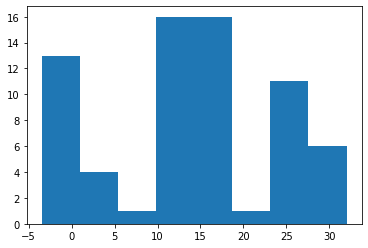

In [188]:
plt.hist(targets_df["GA"],bins="auto")



As can be seen, significant proportion of the dataset has negative gestational age which is inaccurate. Since we are not removing any rows from the dataset, these records will result in some error in the model's predictions.

In [223]:
targets_df["randPerson"].unique().shape
#Total 17 women, each observed 4 times

targets_df = targets_df[["GA","SampleID","data"]]



In [435]:
df_cl1 = pd.merge(df_cl1,targets_df,on="SampleID",).iloc[:,1:].values


In [436]:
df_cl1_train = df_cl1[df_cl1[:,-1]=="train"][:,:-1] 
df_cl1_test = df_cl1[df_cl1[:,-1]=="test"][:,:-1]
#536 features, 1 label


In [437]:
scaling_transf = MinMaxScaler()
X_train = scaling_transf.fit_transform(df_cl1_train[:,:-1])
X_test = scaling_transf.transform(df_cl1_test[:,:-1])

y_train = df_cl1_train[:,-1]
y_test = df_cl1_test[:,-1]

In [238]:

#using MAE - quantile regression
regressor = SGDRegressor(loss="epsilon_insensitive",epsilon=0,penalty="l1",alpha=0.01,max_iter=300,eta0=0.01,power_t=0.25,learning_rate="invscaling",n_iter_no_change=6,verbose=1)
regressor.fit(X_train,y_train)


-- Epoch 1
Norm: 0.82, NNZs: 1858, Bias: 0.045709, T: 56, Avg. loss: 8.580110
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 1776, Bias: 0.059104, T: 112, Avg. loss: 8.272012
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 1622, Bias: 0.053768, T: 168, Avg. loss: 7.761122
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.37, NNZs: 1565, Bias: 0.059246, T: 224, Avg. loss: 7.601926
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.53, NNZs: 1511, Bias: 0.064318, T: 280, Avg. loss: 7.272079
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.73, NNZs: 1498, Bias: 0.073706, T: 336, Avg. loss: 6.931575
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 1429, Bias: 0.069052, T: 392, Avg. loss: 6.863184
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 1.99, NNZs: 1437, Bias: 0.077748, T: 448, Avg. loss: 6.601004
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 2.05, NNZs: 1361, Bias: 0.069157, T: 504, Avg. loss: 6.394029
Total trai

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='epsilon_insensitive',
             max_iter=300, n_iter_no_change=6, penalty='l1', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [239]:
y_pred=regressor.predict(X_test)
mean_absolute_error(y_test,y_pred)


4.267423350516629

LinearRegression doesn't work well, MAE of 4.27 yrs means it's not a very good model. Let's try an ensemble of models (RandomForest) where we will utilize the concept of bagging to make multiple "weak" models that make uncorrelated errors.


In [440]:

#50 estimators, leaves contain less than 2 samples, division only when 1 sample in leaves, boostrap ON but all samples,
#see only sqrt(features) 

rfRegressor = RandomForestRegressor(n_estimators=100,criterion="mae",min_samples_split=2,min_samples_leaf=1,bootstrap=True,n_jobs=-1,verbose=1) #max_features="auto"
rfRegressor.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [441]:
y_pred=rfRegressor.predict(X_train)

print(mean_absolute_error(y_train,y_pred))


y_pred=rfRegressor.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


1.5884948979591835
3.181547619047619


MAE of 3.2 is significantly better than the earlier 4.2. 

## Part-2

In [415]:
sub_cl2_file_names = "cfRNA,metabolome,microbiome".split(",")
sub_cl2_file_names = [x+".csv" for x in sub_cl2_file_names]
sub_cl2_file_names


['cfRNA.csv', 'metabolome.csv', 'microbiome.csv']

In [275]:
df_cfRNA = pd.read_csv(os.path.join(comp_path,sub_cl2_file_names[0])) 
df_metabolome = pd.read_csv(os.path.join(comp_path,sub_cl2_file_names[1]),encoding="iso-8859-1")
df_microbiome = pd.read_csv(os.path.join(comp_path,sub_cl2_file_names[2]))


df_cfRNA = df_cfRNA.sort_values(by="SampleID",axis=0,kind="mergesort")
df_metabolome = df_metabolome.sort_values(by="SampleID",axis=0,kind="mergesort")
df_microbiome = df_microbiome.sort_values(by="SampleID",axis=0,kind="mergesort")



In [448]:
df_cl2 = pd.concat([df_cfRNA,df_metabolome.iloc[:,1:],df_microbiome.iloc[:,1:]],axis=1)
df_cl2 =pd.merge(df_cl2,targets_df,on="SampleID",).iloc[:,1:] #.values

In [277]:
df_cl2
#59308 features now!

,SampleID,C2orf76,ACTL10,CEP135,RP11-613M10.6,NDUFB5P1,MIIP,RP11-98I9.4,C20orf144,RP11-485G7.6,...,ToothGum_Azospirillum,Stool_Azospirillum,VaginalSwab_Sphingomonas.5,Saliva_Sphingomonas.5,ToothGum_Sphingomonas.5,Stool_Sphingomonas.5,VaginalSwab_Thalassospira.9,Saliva_Thalassospira.9,ToothGum_Thalassospira.9,Stool_Thalassospira.9
13,B1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209
30,B2,0.000000,0.0,34.022863,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,-0.034891,-0.034891,-0.034891,-0.034891,-0.034891,-0.034891,-0.034891,-0.034891,-0.034891,-0.034891
47,B3,0.000000,0.0,97.646714,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,-0.025123,-0.025123,-0.025123,-0.025123,-0.025123,-0.025123,-0.025123,-0.025123,-0.025123,-0.025123
64,B4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209,-0.034209
6,G1,2.126079,0.0,86.106183,0.0,0.0,12.756472,1.063039,0.000000,0.0,...,-0.024750,-0.024750,-0.024750,-0.024750,-0.024750,-0.024750,-0.024750,-0.024750,-0.024750,-0.024750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,W4,35.254263,0.0,3.204933,0.0,0.0,9.614799,0.000000,0.000000,0.0,...,-0.026713,-0.026713,-0.026713,-0.026713,-0.026713,-0.026713,-0.026713,-0.026713,-0.026713,-0.026713
10,X1,0.000000,0.0,10.638411,0.0,0.0,74.468877,0.000000,0.000000,0.0,...,-0.023462,-0.023462,-0.023462,-0.023462,-0.023462,-0.023462,-0.023462,-0.023462,-0.023462,-0.023462
27,X2,0.000000,0.0,0.000000,0.0,0.0,70.901872,0.000000,0.000000,0.0,...,-0.022884,-0.022884,-0.022884,-0.022884,-0.022884,-0.022884,-0.022884,-0.022884,-0.022884,-0.022884
44,X3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,-0.026088,-0.026088,-0.026088,-0.026088,-0.026088,-0.026088,-0.026088,-0.026088,-0.026088,-0.026088


In [449]:
df_cl2_train = df_cl2[df_cl2.iloc[:,-1]=="train"].iloc[:,:-1] 
df_cl2_test = df_cl2[df_cl2.iloc[:,-1]=="test"].iloc[:,:-1]

#df_cl2_train = df_cl2_train[:,:-1]
#df_cl2_test = df_cl2_test[:,:-1]


In [393]:


def correlation(dataset, test_dataset, threshold=0.9):
    col_corr = set() # Set of all the names of deleted columns
    dataset = dataset.astype(np.float32)
    #corr_matrix = dataset.iloc[:,:-1].corr() #ignoring the target column

    for i in range(len(dataset.columns)-1):
        for j in range(i):
            if (dataset.columns[j] not in col_corr) and (abs(np.corrcoef(dataset.iloc[:,i],dataset.iloc[:,j])[0][1]) >= threshold):
                colname = dataset.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    del test_dataset[colname]

    return dataset,test_dataset

df_cl2_train,df_cl2_test = correlation(df_cl2_train,df_cl2_test)


C:\Users\Lenovo\.conda\envs\dataX_1\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lenovo\.conda\envs\dataX_1\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


KeyboardInterrupt: 

In [450]:

vars = VarianceThreshold()
df_cl2_train = vars.fit_transform(df_cl2_train.values)
df_cl2_test = vars.transform(df_cl2_test.values)


In [451]:
#536 features, 1 label

scaling_transf = MinMaxScaler()
X_train = scaling_transf.fit_transform(df_cl2_train[:,:-1])
X_test = scaling_transf.transform(df_cl2_test[:,:-1])

y_train = df_cl2_train[:,-1]
y_test = df_cl2_test[:,-1]

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [452]:
bestFeatures=SelectKBest(f_regression, k=1000)
X_train = bestFeatures.fit_transform(X_train, y_train)
X_test = bestFeatures.transform(X_test)


In [453]:

rfRegressor = RandomForestRegressor(n_estimators=100,criterion="mae",min_samples_split=2,min_samples_leaf=1,bootstrap=False,n_jobs=-1,verbose=1) #
rfRegressor.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   54.5s finished


RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [454]:
y_pred = rfRegressor.predict(X_test)
mean_absolute_error(y_test,y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


2.8808333367322163

In [455]:
y_pred = rfRegressor.predict(X_train)
mean_absolute_error(y_train,y_pred)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.0

## Part-3

In [417]:
sub_cl3_file_names = sub_cl1_file_names+sub_cl2_file_names
sub_cl3_file_names


['immunome.csv',
 'SerumLuminex.csv',
 'plasmaLuminex.csv',
 'plasmaSomalogic.csv',
 'cfRNA.csv',
 'metabolome.csv',
 'microbiome.csv']

In [456]:

df_cl3 = pd.concat([df_cfRNA,df_metabolome.iloc[:,1:],df_microbiome.iloc[:,1:],df_immunome.iloc[:,1:],df_SerumLuminex.iloc[:,1:],df_plasmaLuminex.iloc[:,1:],df_plasmaSomalogic.iloc[:,1:]],axis=1)


In [457]:
df_cl3 =pd.merge(df_cl3,targets_df,on="SampleID",).iloc[:,1:] #.values


In [458]:
df_cl3_train = df_cl3[df_cl3.iloc[:,-1]=="train"].iloc[:,:-1] 
df_cl3_test = df_cl3[df_cl3.iloc[:,-1]=="test"].iloc[:,:-1]


In [459]:

vars = VarianceThreshold()
df_cl3_train = vars.fit_transform(df_cl3_train.values)
df_cl3_test = vars.transform(df_cl3_test.values)


In [460]:
#536 features, 1 label

scaling_transf = MinMaxScaler()
X_train = scaling_transf.fit_transform(df_cl3_train[:,:-1])
X_test = scaling_transf.transform(df_cl3_test[:,:-1])

y_train = df_cl3_train[:,-1]
y_test = df_cl3_test[:,-1]

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [463]:
bestFeatures=SelectKBest(f_regression, k=1000)
X_train = bestFeatures.fit_transform(X_train, y_train)
X_test = bestFeatures.transform(X_test)


In [464]:

rfRegressor = RandomForestRegressor(n_estimators=100,criterion="mae",min_samples_split=2,min_samples_leaf=1,bootstrap=False,n_jobs=-1,verbose=1) #
rfRegressor.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished


RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [467]:
y_pred = rfRegressor.predict(X_test)
mean_absolute_error(y_test,y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


1.4716666648714318

In [469]:
y_pred = rfRegressor.predict(X_train)
mean_absolute_error(y_train,y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.0